In [1]:
#Import relevant libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [14]:
## Load Data
def load_data(celltype): 
    data_str = 'result_tables/LME/' + celltype
    items = os.listdir(data_str)
    dfs = {}
    for item in items: 
        if item.endswith('.csv'):
            file_path = os.path.join(data_str, item)
            df = pd.read_csv(file_path)
            dfs[item] = df
    return dfs

In [17]:
Adict = pd.read_csv('result_tables/LME/lme_Adict_GLM.csv')
Cardio = pd.read_csv('result_tables/LME/lme_Cardio_GLM.csv')
Dem = pd.read_csv('result_tables/LME/lme_Dem_GLM.csv')
Metab = pd.read_csv('result_tables/LME/lme_Metab_GLM.csv')
Piscol = pd.read_csv('result_tables/LME/lme_Piscol_GLM.csv')

In [30]:
# Plotting function
def plot_lme_results(df, celltype, graph, ylabel):
    # Filter out the 'Rsquared' row
    #df1 = df
    df = df[df['Name'] != 'Rsquared']
    title = 'Effect on {}'.format(graph)
    var_names = df['Name'][1:]
    estimate = df['Estimate'][1:]
    lower = df['Lower'][1:]
    upper = df['Upper'][1:]
    p_values = df['pValue'][1:]

    # Plotting
    fig, ax = plt.subplots()

    # Set color based on celltype
    if celltype == 'ON alpha':
        colors = ['cyan'] * len(var_names)
    elif celltype == 'OFF sustained alpha':
        colors = ['magenta'] * len(var_names)  
    else:
        colors = ['seagreen'] * len(var_names)

    bars = ax.bar(var_names, estimate, color=colors, edgecolor='k')

    # Error bars using 95% CI
    for bar, y, lower_ci, upper_ci, p_value in zip(bars, estimate, lower, upper, p_values):
        ax.errorbar(
            bar.get_x() + bar.get_width() / 2,
            y,
            yerr=[[y - lower_ci], [upper_ci - y]],  
            fmt='k.',
            capsize=5,
            capthick=1,
            elinewidth=1
        )

        # Calculate the vertical position for the p-value star
        star_y_position = max(y + upper_ci + 5, y - lower_ci - 5)

        # Add star and p-value??
        if p_value <= 0.015:
            ax.text(bar.get_x() + bar.get_width() / 2, star_y_position-25, '■', ha='center', va='top', color='red')
            #ax.text(bar.get_x() + bar.get_width() / 2, star_y_position + 10, f'p={p_value:.3f}', ha='center', va='bottom', color='black')  # Add p-value
        elif p_value < 0.05:
            ax.text(bar.get_x() + bar.get_width() / 2, star_y_position-5, '*', ha='center', va='top', color='red')
            #ax.text(bar.get_x() + bar.get_width() / 2, star_y_position + 10, f'p={p_value:.3f}', ha='center', va='bottom', color='black')  # Add p-value

    # Create a legend for the p values
    legend_elements = [
        Line2D([0], [0], marker='*', color='w', markerfacecolor='red', markersize=10, label='p < 0.05'), 
        Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10, label='p < 0.01')
        ]

    # Plot error bars for 95% CI in a separate legend. Just weird matplotlib issues
    handles, labels = ax.get_legend_handles_labels()
    handles.append(ax.errorbar([], [], yerr=1, fmt='o', color='k', markersize=5, capsize=5, capthick=1, elinewidth=1))
    labels.append('95% CI')

    # Combine the two legends
    handles.extend(legend_elements)
    labels.extend(['p < 0.05', 'p < 0.01', '95% CI'])

    # Display the combined legend
    ax.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1, 1))
    #ax.legend(df1[['Estimate', 'Rsquared']])

    ax.set_ylabel(ylabel)
    ax.set_title(title + ' {}'.format(celltype))
    ax.set_xticklabels(var_names, rotation=45, ha='right')
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_xlabel('')

    plt.show()


C:\Users\santi\AppData\Local\Temp\ipykernel_30156\4290301144.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


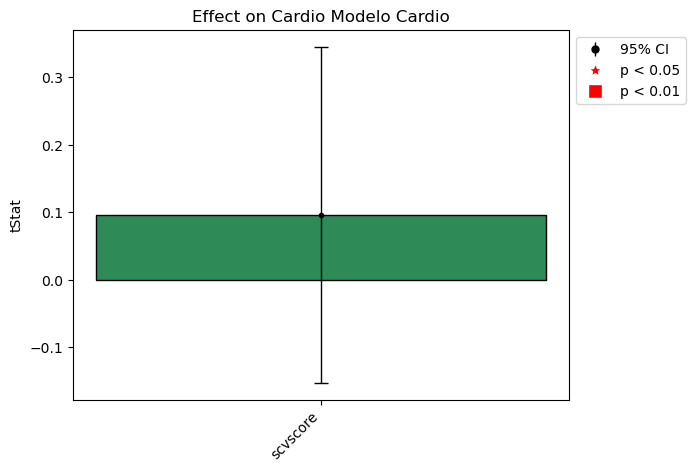

In [32]:
plot_lme_results(Cardio, 'Modelo Cardio', 'Cardio', 'tStat')


C:\Users\santi\AppData\Local\Temp\ipykernel_30156\4290301144.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


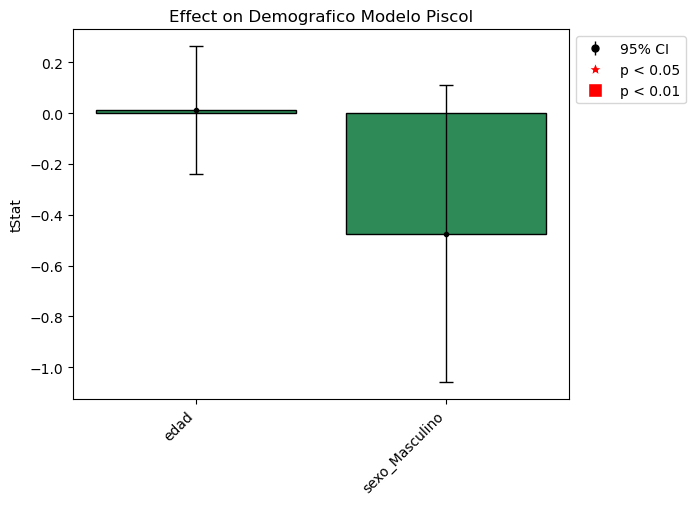

In [33]:
plot_lme_results(Dem, 'Modelo Piscol', 'Demografico', 'tStat')

C:\Users\santi\AppData\Local\Temp\ipykernel_30156\4290301144.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


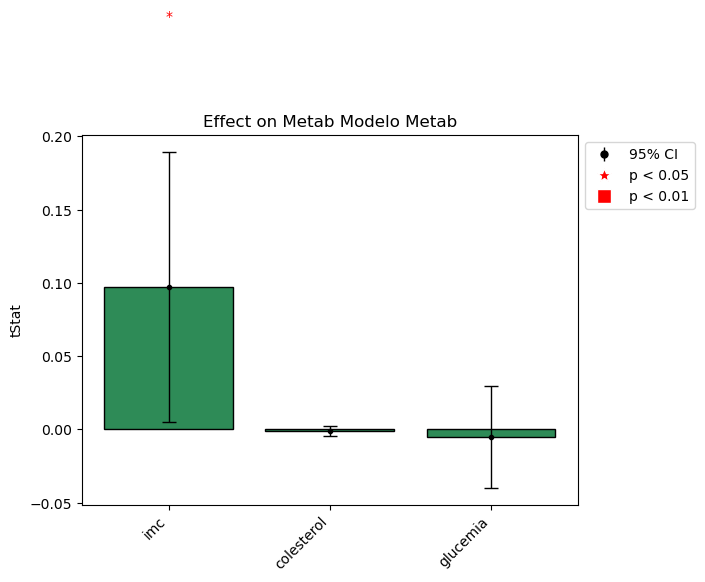

In [35]:
plot_lme_results(Metab, 'Modelo Metab', 'Metab', 'tStat')

C:\Users\santi\AppData\Local\Temp\ipykernel_30156\4290301144.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


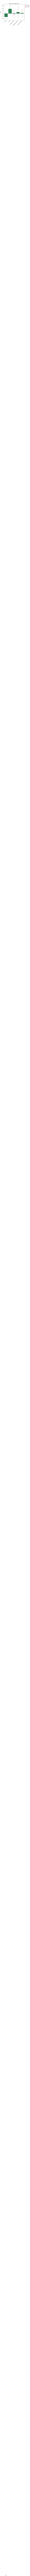

In [34]:
plot_lme_results(Piscol, 'Modelo Psico', 'Pisco', 'tStat')

In [84]:
''''''
# Function to plot the 3 alphas per condition
def show_plots (plot_str, title, ylabel):
    ON_df = ON_alpha_data['{}_ON_table.csv'.format(plot_str)]
    OFFsus_df = OFF_sus_data['{}_OFFsus_table.csv'.format(plot_str)]
    OFFtr_df = OFF_tr_data['{}_OFFtr_table.csv'.format(plot_str)]
    

    plot_lme_results(ON_df, 'ON alpha', title, ylabel)
    plot_lme_results(OFFsus_df, 'OFF sustained alpha', title, ylabel)
    plot_lme_results(OFFtr_df, 'OFF transient alpha', title, ylabel)
'''

C:\Users\santi\AppData\Local\Temp\ipykernel_33832\3996029559.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


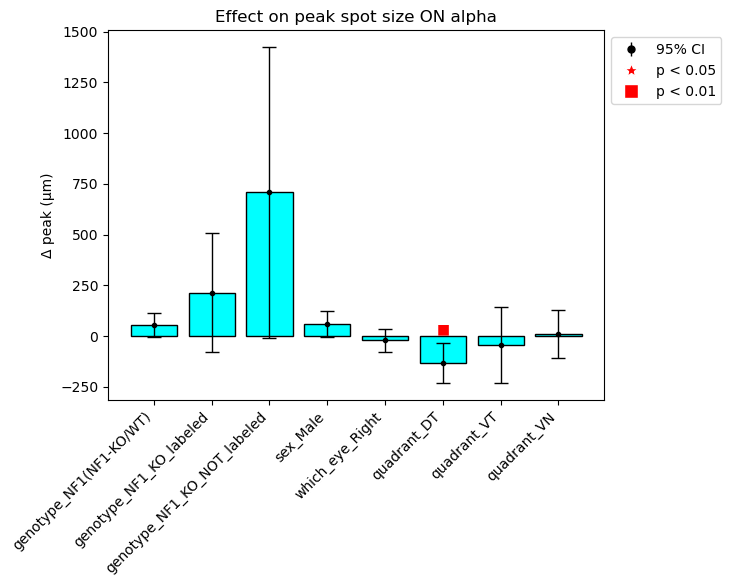

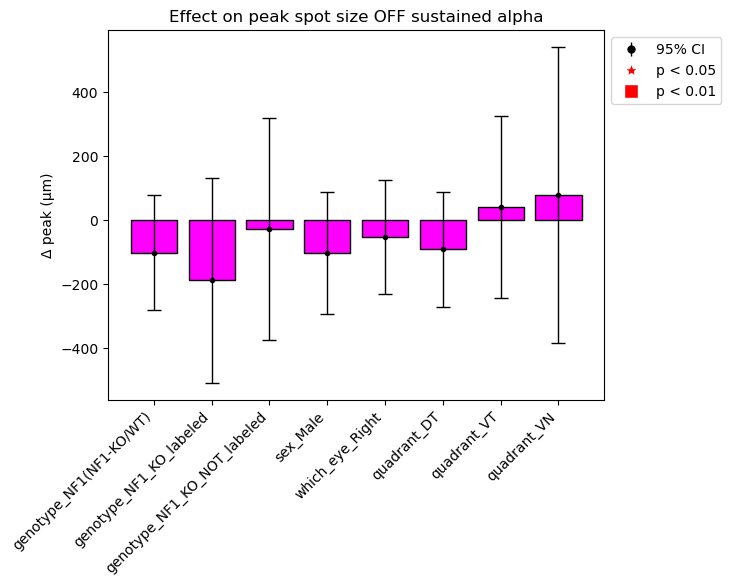

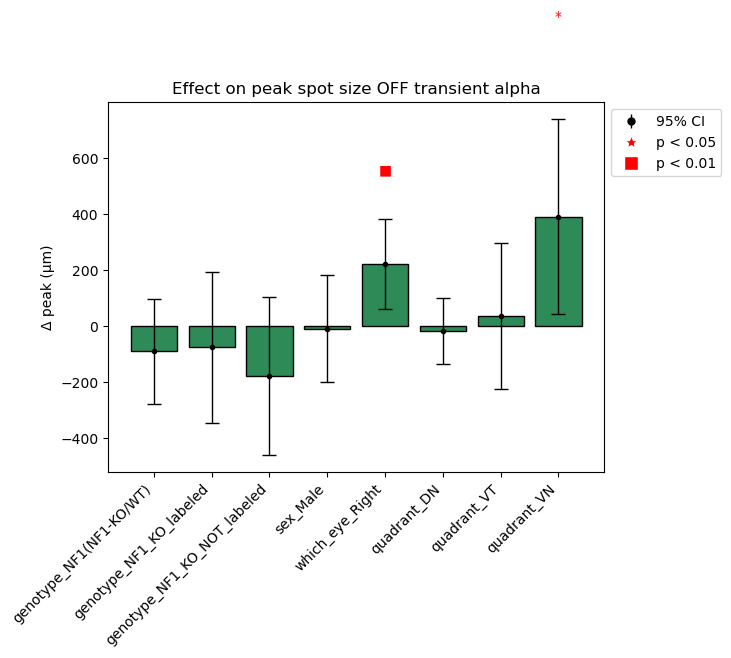

In [85]:
#Plot peak spot size 
show_plots('lme_peak_size', 'peak spot size', 'Δ peak (µm)' )

C:\Users\santi\AppData\Local\Temp\ipykernel_33832\3996029559.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


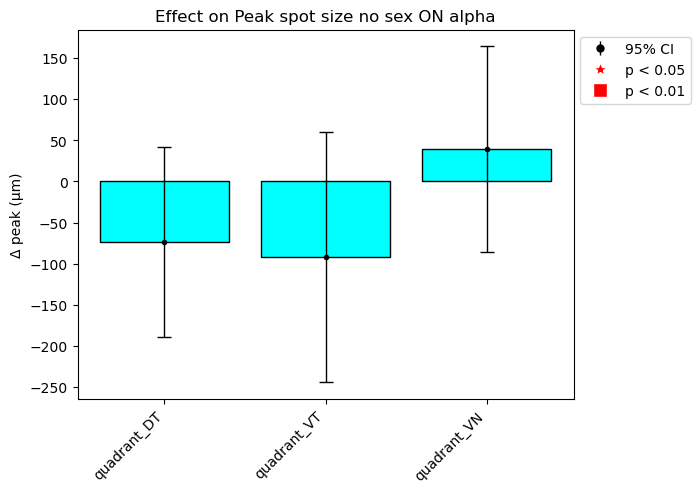

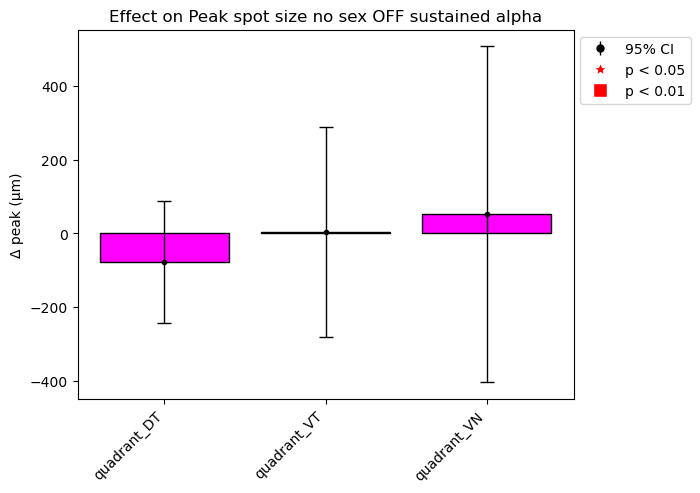

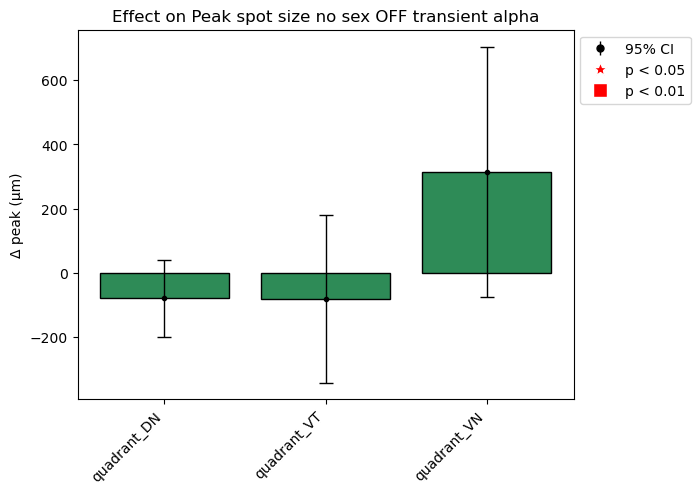

In [86]:
#PLot peak spot size no sex
show_plots('lme_peak_size_nosex', 'Peak spot size no sex', 'Δ peak (µm)')

C:\Users\santi\AppData\Local\Temp\ipykernel_33832\3996029559.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


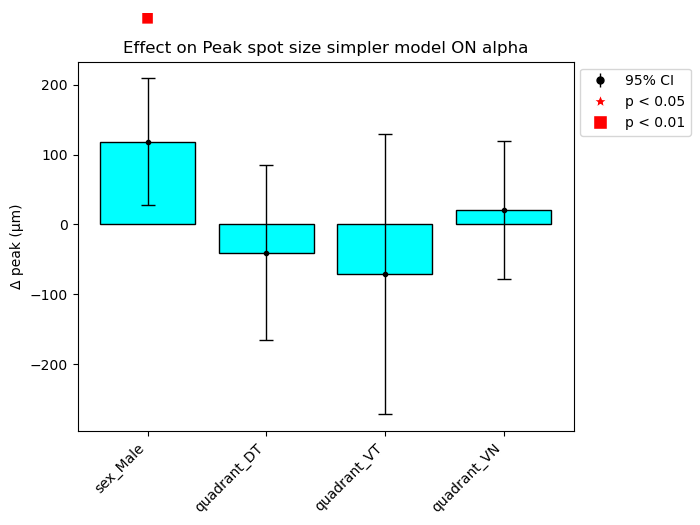

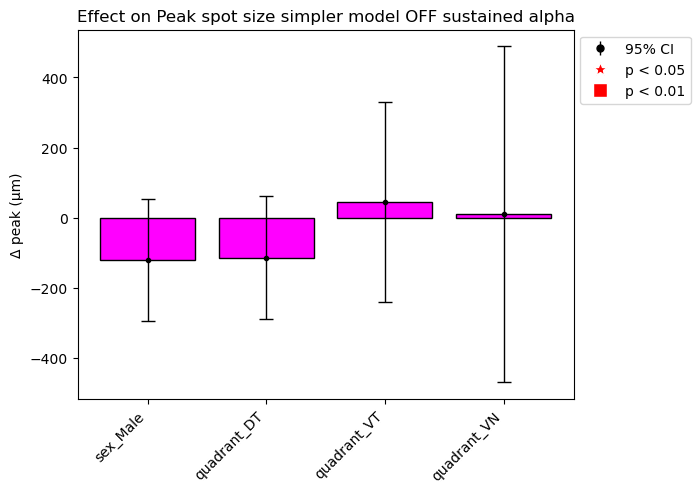

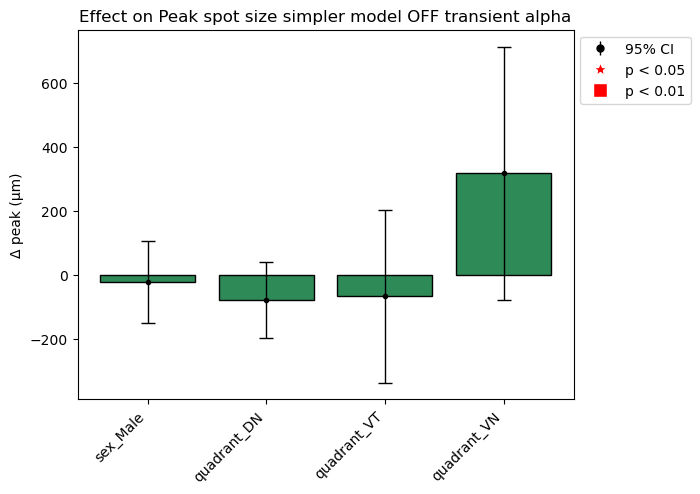

In [87]:
#PLot peak spot size simpler model
show_plots('lme_peak_size_simpler', 'Peak spot size simpler model', 'Δ peak (µm)')

C:\Users\santi\AppData\Local\Temp\ipykernel_33832\3996029559.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


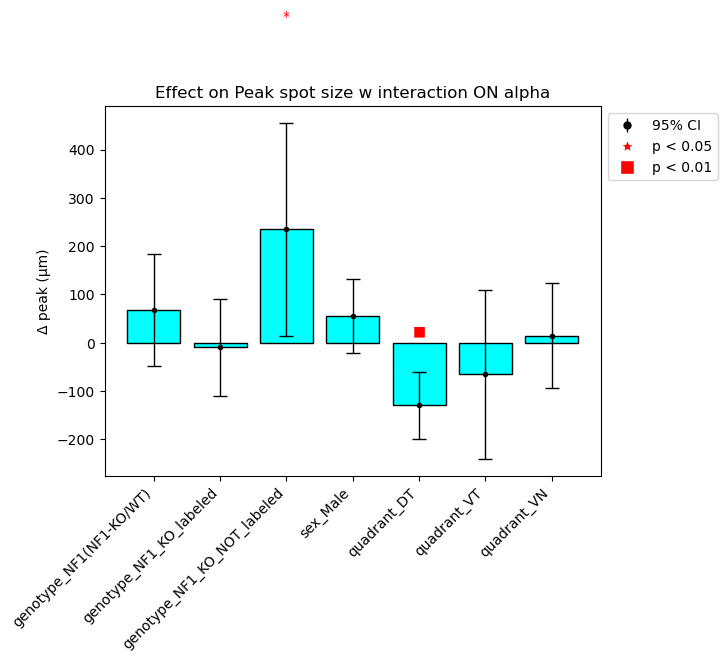

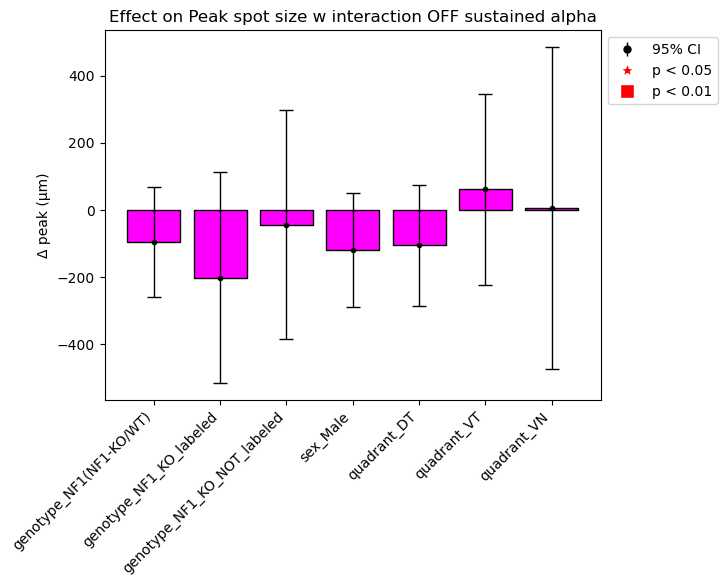

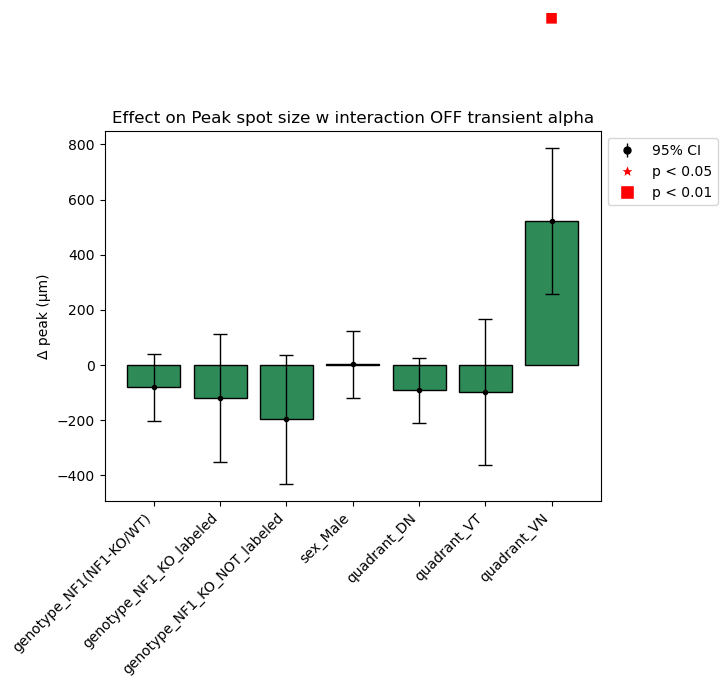

In [88]:
#PLot peak spot size simpler model with interaction
show_plots('lme_peak_size_w_interaction', 'Peak spot size w interaction', 'Δ peak (µm)')

C:\Users\santi\AppData\Local\Temp\ipykernel_33832\3996029559.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


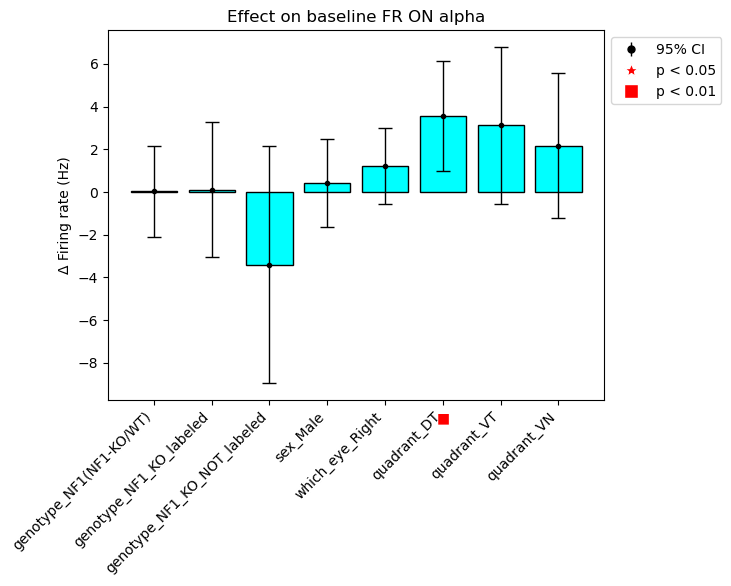

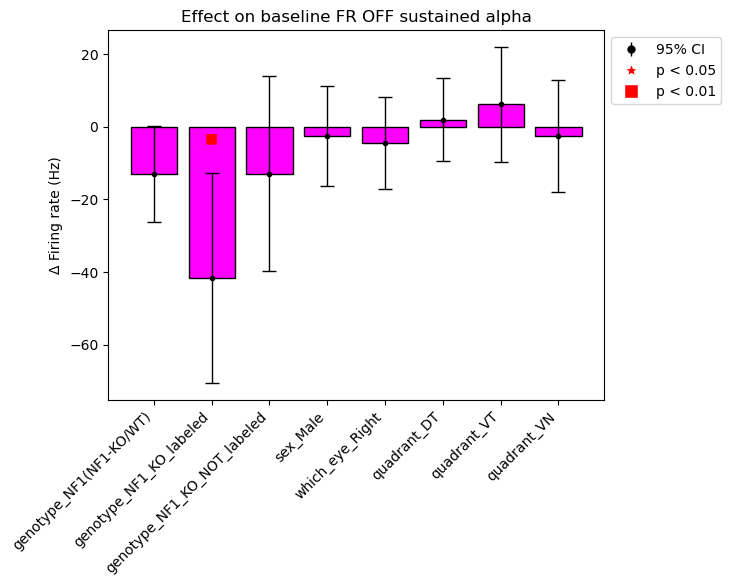

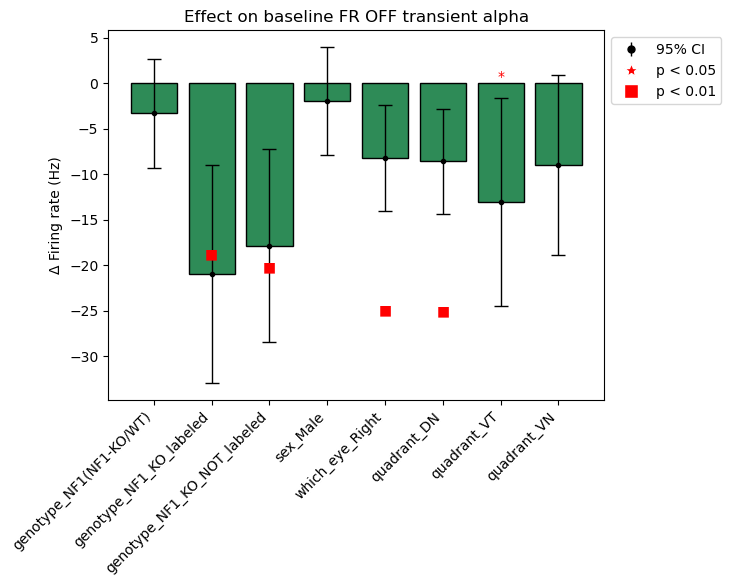

In [89]:
#Plot effect on baseline FR
show_plots('lme_baseline_FR', 'baseline FR', 'Δ Firing rate (Hz)')

C:\Users\santi\AppData\Local\Temp\ipykernel_33832\3996029559.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


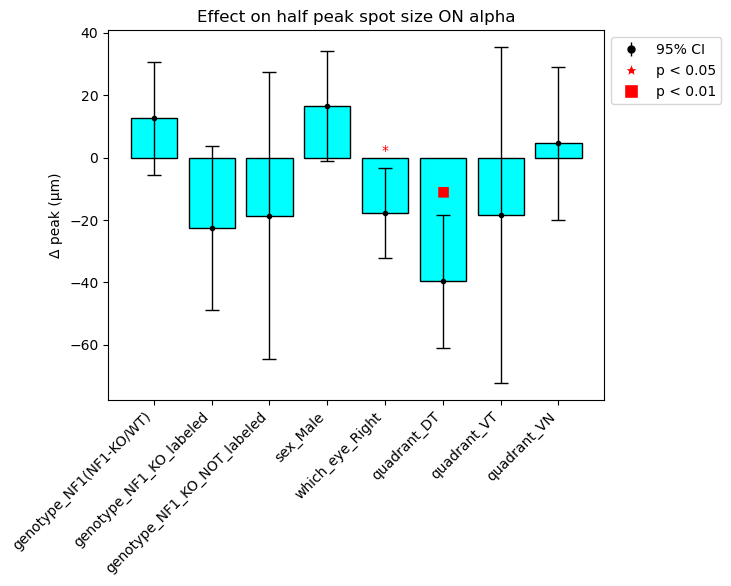

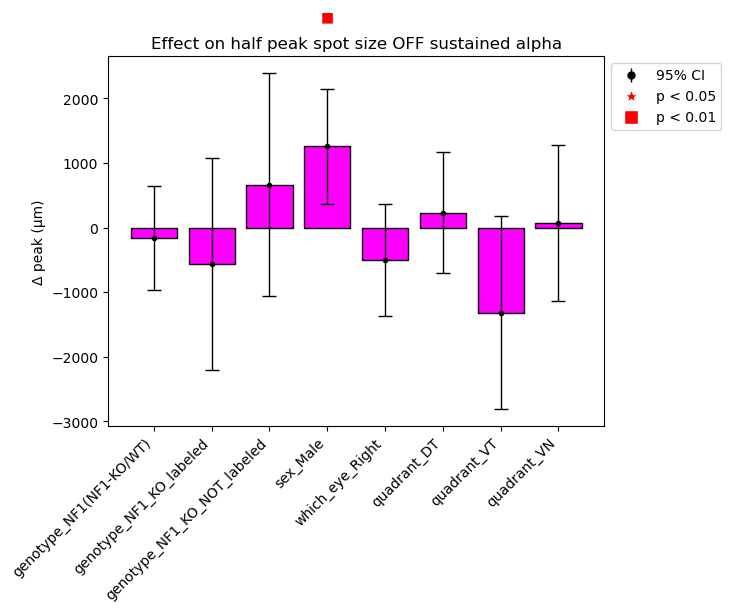

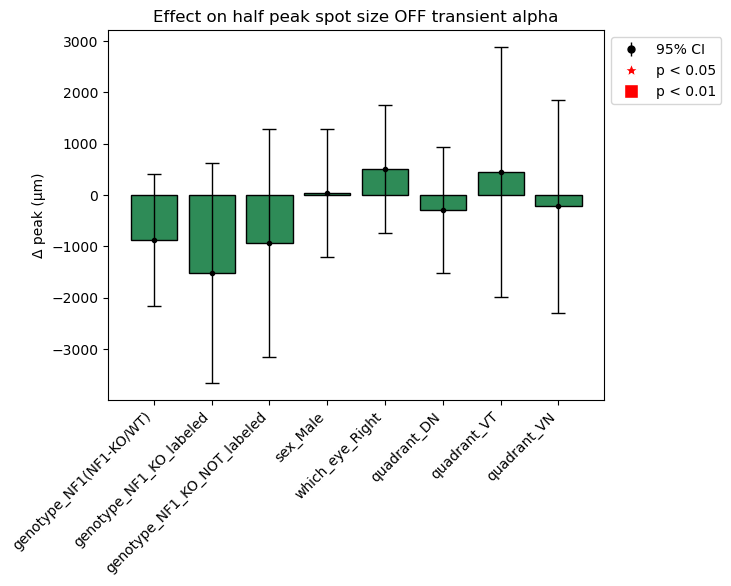

In [90]:
#Plot effect on half peak sixe
show_plots('lme_half_peak_size', 'half peak spot size','Δ peak (µm)')

C:\Users\santi\AppData\Local\Temp\ipykernel_33832\3996029559.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


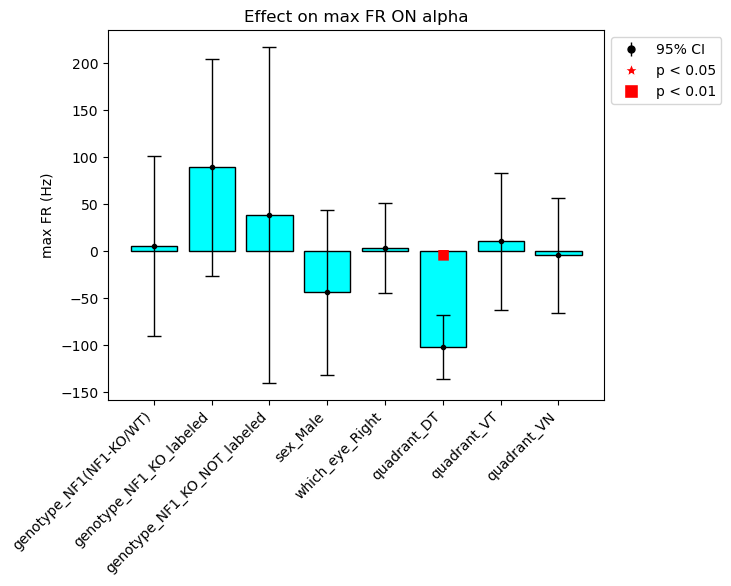

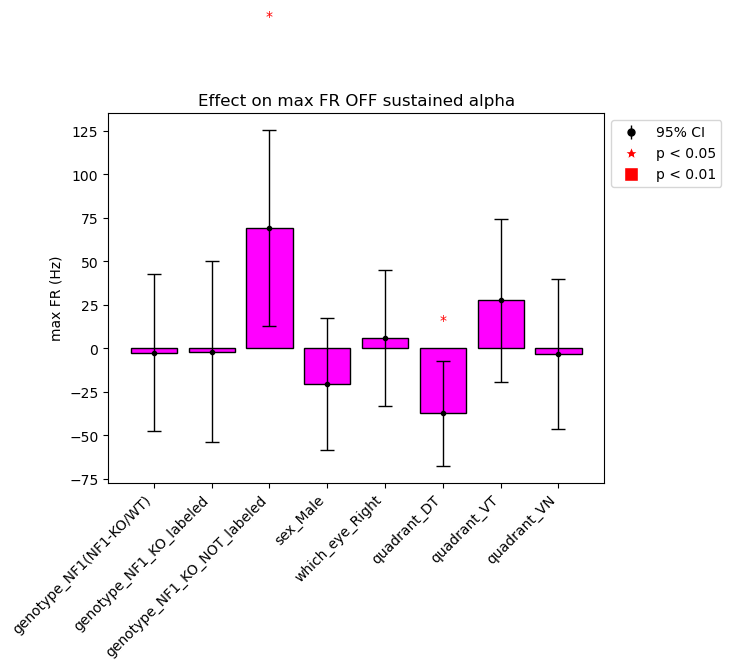

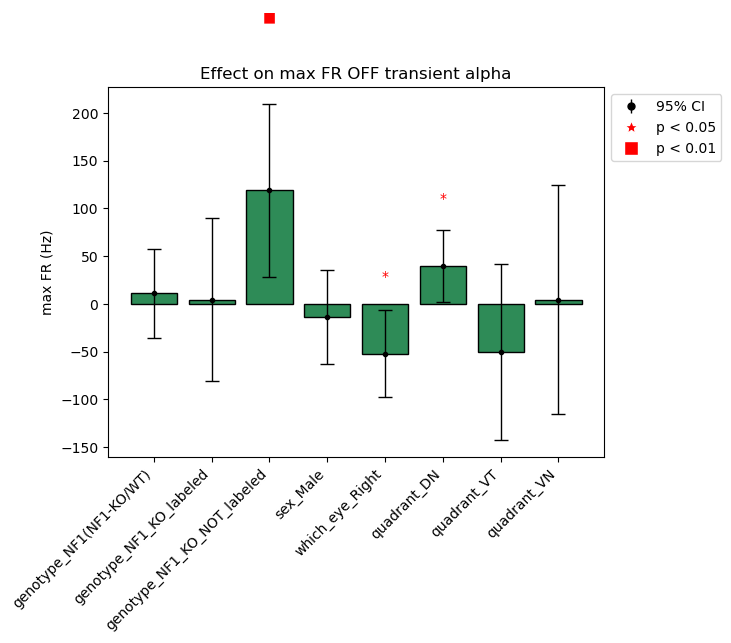

In [91]:
#Plot effect on Max FR
show_plots('lme_max_FR', 'max FR', 'max FR (Hz)')

C:\Users\santi\AppData\Local\Temp\ipykernel_33832\3996029559.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


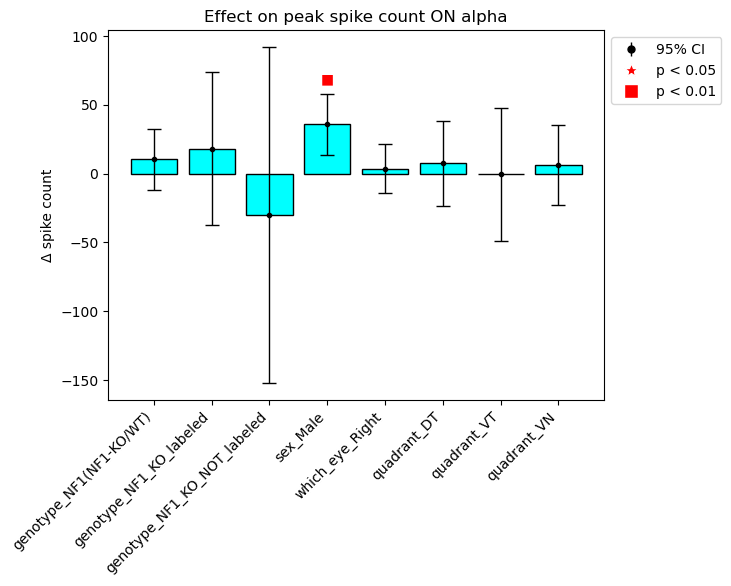

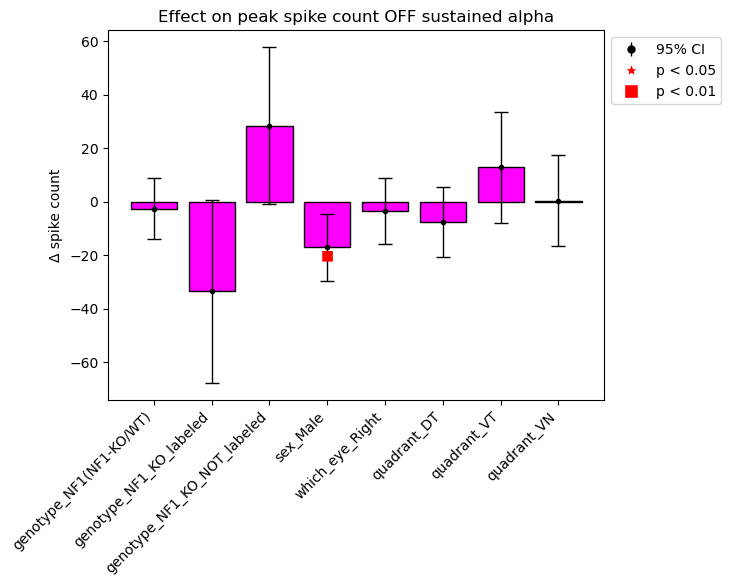

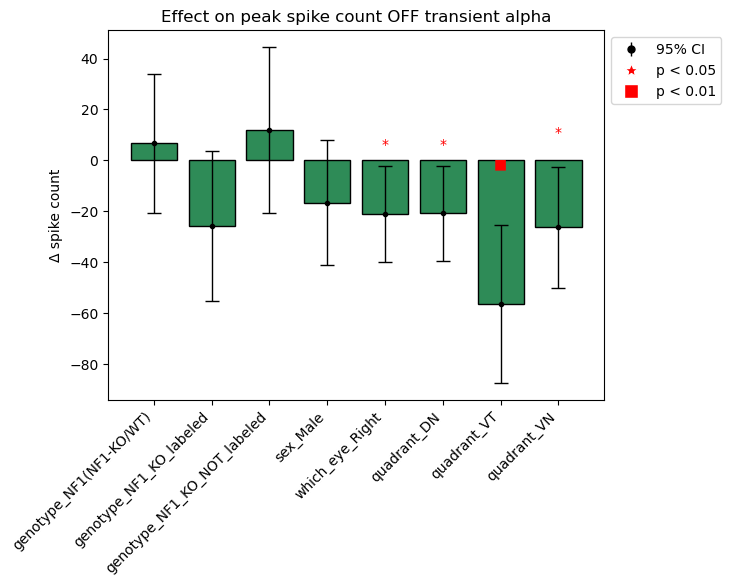

In [92]:
#Plot effect on peak spike count
show_plots('lme_peak_spikes', 'peak spike count', 'Δ spike count')